In [3]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


**Loading Dataset**

In [4]:
#loading the dataset with all the columns visible
pd.set_option('display.max_columns',None)
df=pd.read_csv("/content/Employee.csv")
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,No,27,High School,Single,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,71,High School,Divorced,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
df.shape

(74498, 24)

In [6]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [7]:
df.dtypes

,0
Employee ID,int64
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64


In [8]:
#dropind Employee ID
df.drop('Employee ID',axis=1,inplace=True)

In [9]:
df.head(3)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  object 
 2   Years at Company          74498 non-null  int64  
 3   Job Role                  74498 non-null  object 
 4   Monthly Income            74498 non-null  int64  
 5   Work-Life Balance         74494 non-null  object 
 6   Job Satisfaction          74498 non-null  object 
 7   Performance Rating        74494 non-null  object 
 8   Number of Promotions      74493 non-null  float64
 9   Overtime                  74498 non-null  object 
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74493 non-null  object 
 12  Marital Status            74494 non-null  object 
 13  Number of Dependents      74492 non-null  float64
 14  Job Le

**Exploratory Data Analysis**

<Figure size 3000x2000 with 0 Axes>

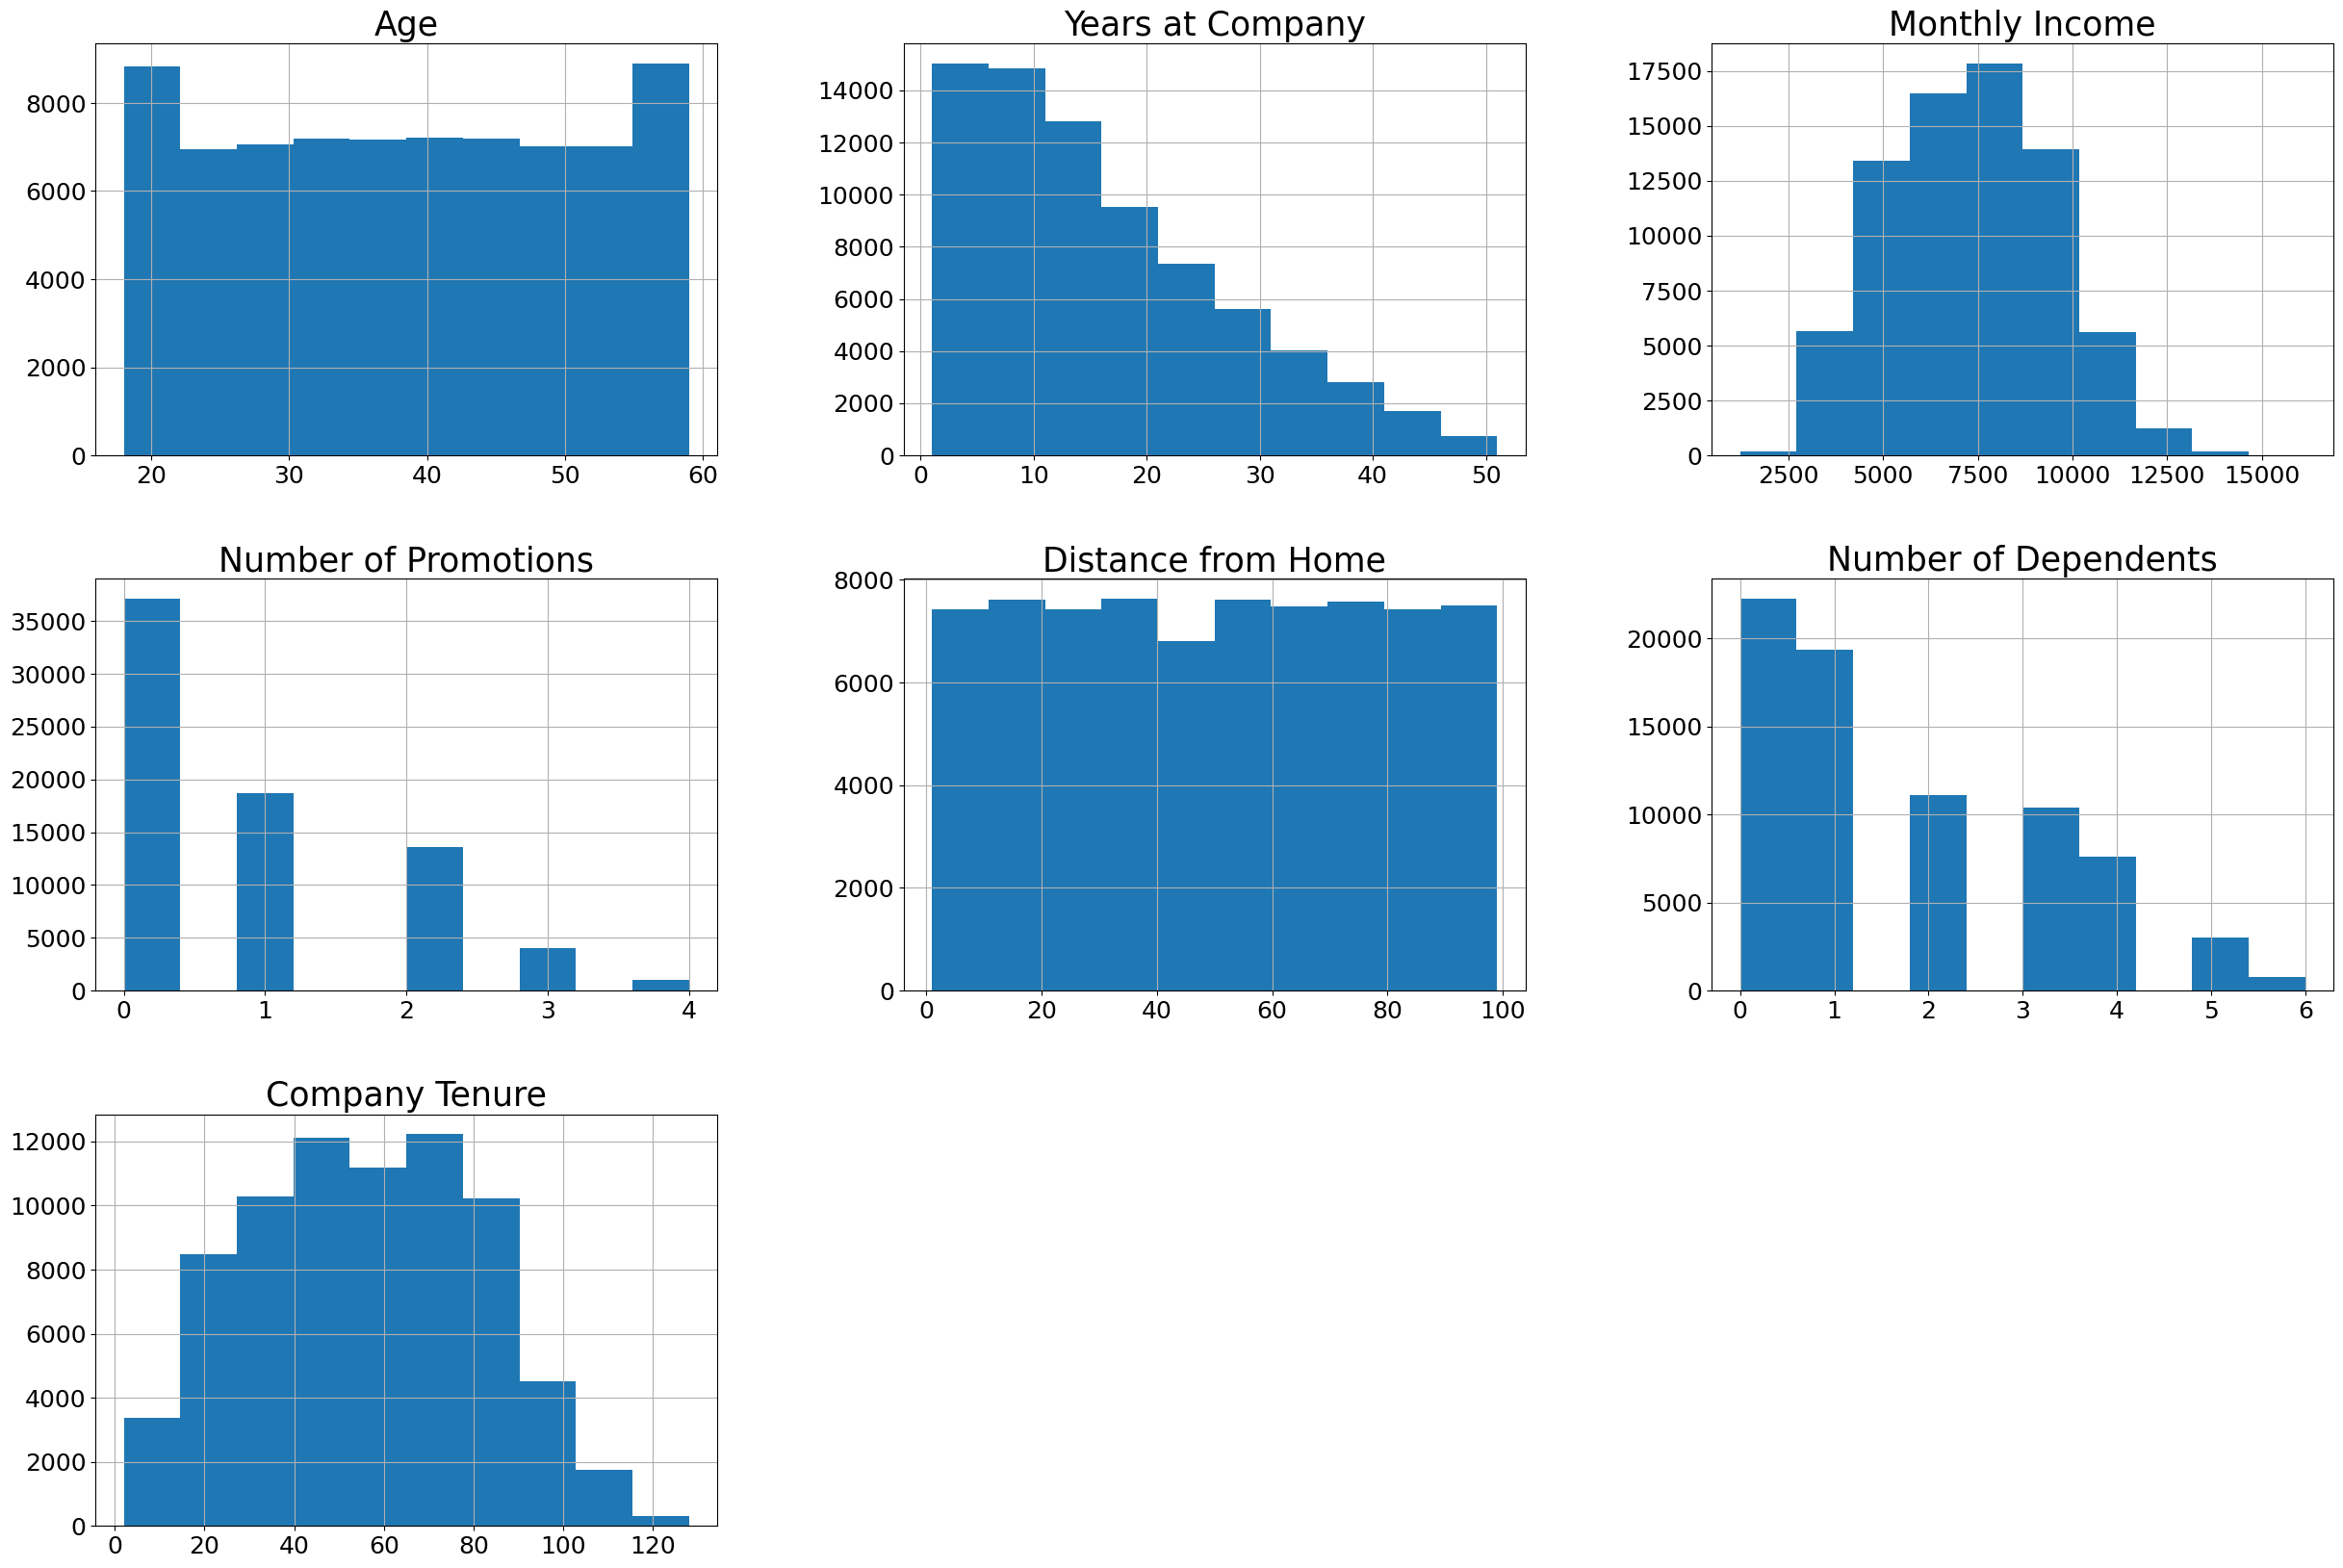

In [11]:
# Adjust the figure size
fig = plt.figure(figsize=(30, 20))

# Generate histograms for all numerical columns
ax = df.hist(figsize=(30, 20))

# Set the font sizes
for axis in ax.flatten():
    axis.set_title(axis.get_title(), fontsize=25)
    axis.set_xlabel(axis.get_xlabel(), fontsize=20)
    axis.set_ylabel(axis.get_ylabel(), fontsize=20)
    axis.tick_params(axis='both', which='major', labelsize=18)

**Preprocessing**

In [12]:
#null values

In [13]:
df.isnull().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,4
Job Satisfaction,0
Performance Rating,4
Number of Promotions,5
Overtime,0


In [14]:
catogorical_cols = ['Work-Life Balance','Performance Rating','Education Level','Marital Status','Job Level','Company Size',
                    'Remote Work', 'Employee Recognition']

In [15]:
# Null values from the catogorical columns can be filled using MODE

In [16]:
for i in catogorical_cols:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,5
Overtime,0


In [18]:
#filling null values of numerical columns

<Axes: xlabel='Number of Dependents', ylabel='Count'>

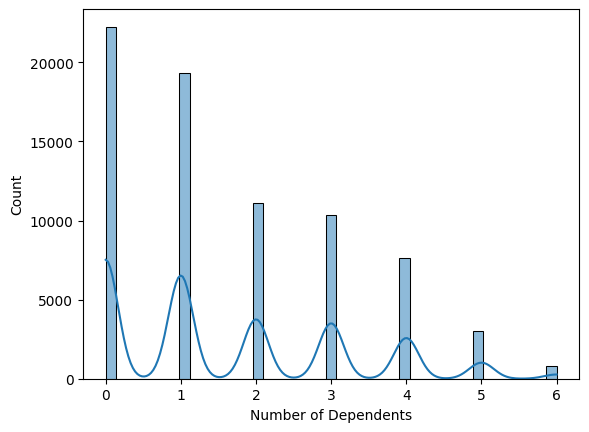

In [19]:
#histogram of Number of Dependents
sns.histplot(df['Number of Dependents'],kde= True)

In [20]:
#here by analysing the histogram    MODE will be a suitable option
df['Number of Dependents'].fillna(df['Number of Dependents'].mode()[0],inplace=True)

<Axes: xlabel='Number of Promotions', ylabel='Count'>

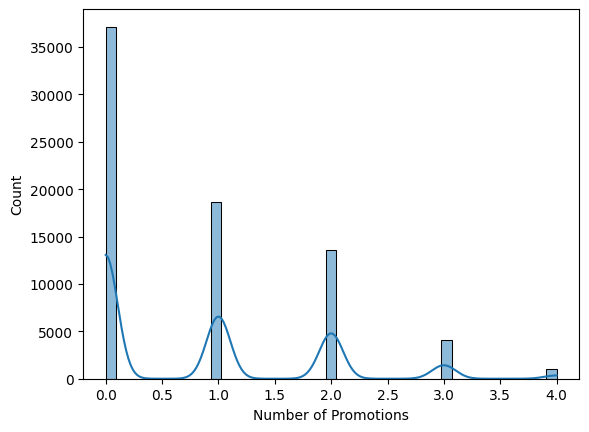

In [21]:
sns.histplot(df['Number of Promotions'],kde= True)

In [22]:
# in this case most of the values are either 0 or 1 so null values can be filled with 0
df['Number of Promotions'].fillna(0,inplace=True)

In [23]:
df.isna().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0
Overtime,0


In [24]:
#Check for duplicated values
df.duplicated().sum()

0

In [25]:
df.dtypes

,0
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64
Overtime,object


Checking for outliers

In [26]:
numerical_cols=['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home'
,'Number of Dependents','Company Tenure']


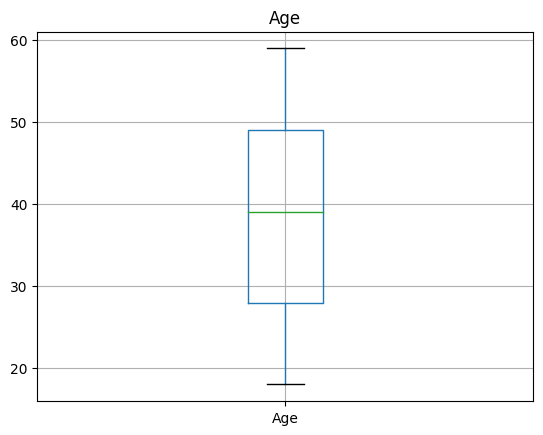

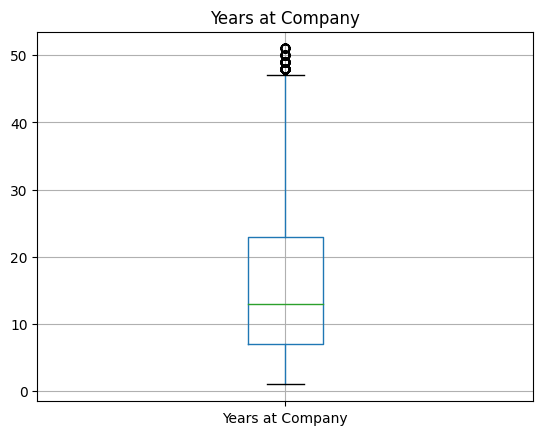

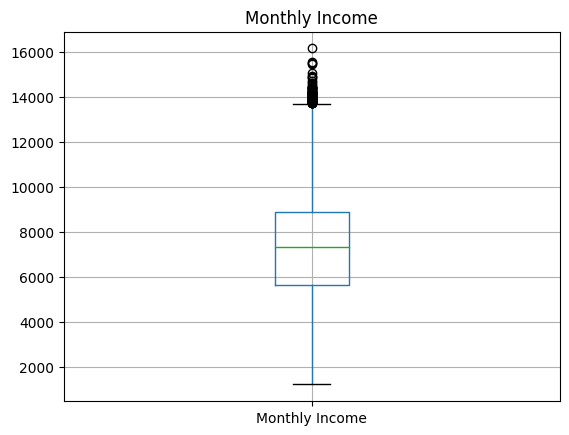

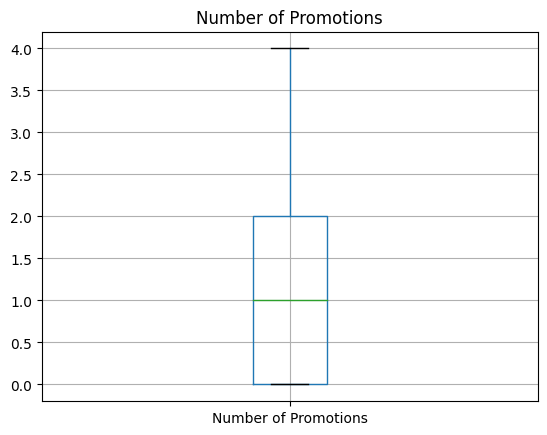

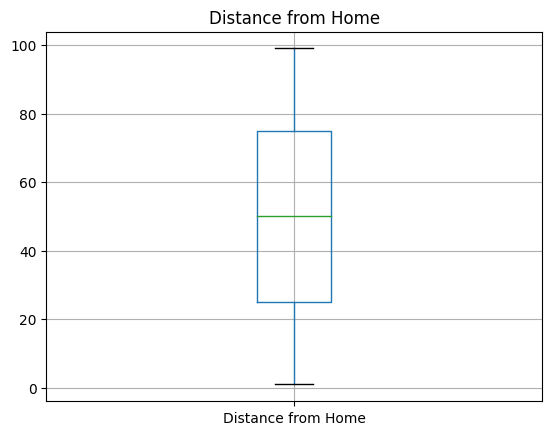

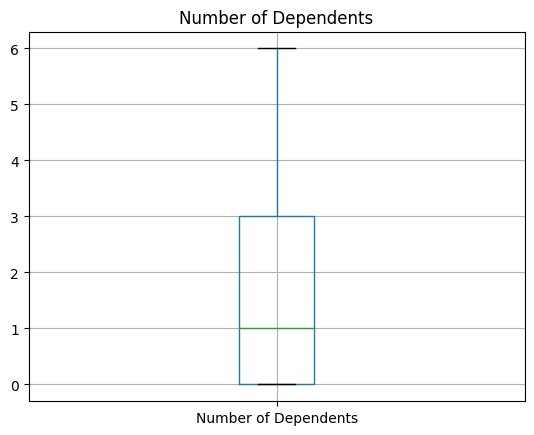

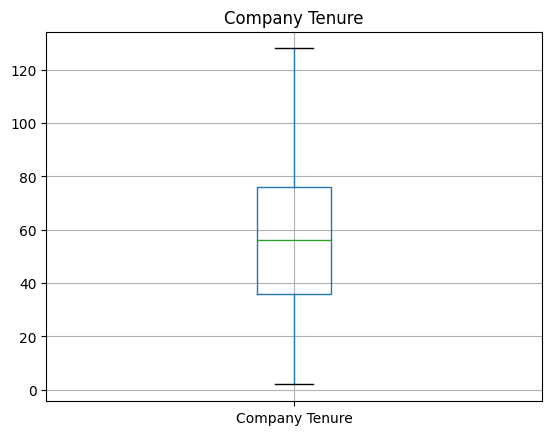

In [27]:
for col in numerical_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

In [28]:
#removing outliers
columns=['Years at Company','Monthly Income']

q1=df[columns].quantile(0.25)
q3=df[columns].quantile(0.75)
iqr=q3-q1

min_value=df[columns]<q1-(1.5*iqr)
max_value=df[columns]>q3+(1.5*iqr)

df[columns]=np.where(min_value,q1-(1.5*iqr),df[columns])
df[columns]=np.where(max_value,q3+(1.5*iqr),df[columns])

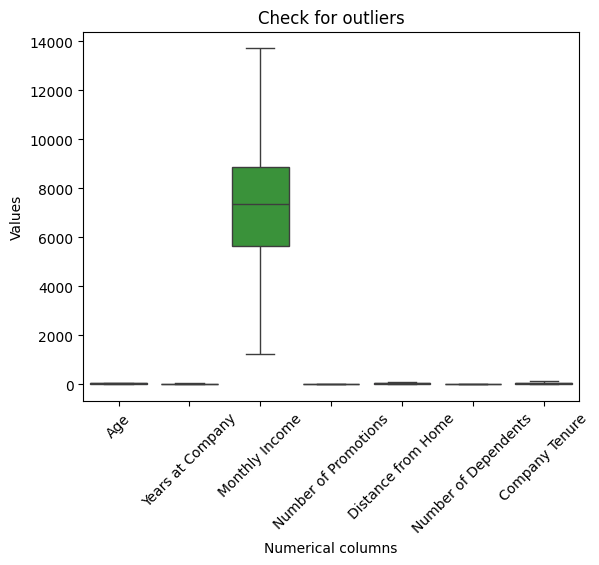

In [29]:

plt.figure9figsize=(10,7)
sns.boxplot(data = df[numerical_cols])
plt.title('Check for outliers')
plt.ylabel('Values')
plt.xlabel('Numerical columns')
plt.xticks(rotation= 45,fontsize = 10)
plt.show()

Encoding

In [30]:
df.dtypes

,0
Age,int64
Gender,object
Years at Company,float64
Job Role,object
Monthly Income,float64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64
Overtime,object


In [31]:
#unique values of catogorical colums
catogorical_cols=['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Overtime','Education Level','Marital Status',
                  'Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities',
                  'Company Reputation','Employee Recognition','Attrition']

for i in catogorical_cols:
  print(df[i].value_counts())


Gender
Male      40826
Female    33672
Name: count, dtype: int64
Job Role
Technology    19322
Healthcare    17074
Education     15658
Media         11996
Finance       10448
Name: count, dtype: int64
Work-Life Balance
Good         28161
Fair         22528
Excellent    13431
Poor         10378
Name: count, dtype: int64
Job Satisfaction
High         37245
Very High    15079
Medium       14717
Low           7457
Name: count, dtype: int64
Performance Rating
Average          44720
High             14910
Below Average    11139
Low               3729
Name: count, dtype: int64
Overtime
No     50157
Yes    24341
Name: count, dtype: int64
Education Level
Bachelor’s Degree    22336
Associate Degree     18648
Master’s Degree      15019
High School          14679
PhD                   3816
Name: count, dtype: int64
Marital Status
Married     37421
Single      25999
Divorced    11078
Name: count, dtype: int64
Job Level
Entry     29783
Mid       29676
Senior    15039
Name: count, dtype: int64
Company

In [32]:
# manual encoding for binary values
df['Innovation Opportunities'] = df['Innovation Opportunities'].map({'No': 0, 'Yes': 1})
df['Leadership Opportunities']=df['Leadership Opportunities'].map({'No':0,'Yes':1})
df['Remote Work']=df['Remote Work'].map({'No':0,'Yes':1})
df['Overtime']=df['Overtime'].map({'No':0,'Yes':1})
df['Attrition']=df['Attrition'].map({'Stayed':1,'Left':0})

In [33]:
# manual encoding for datas with ordinal values
df['Work-Life Balance']=df['Work-Life Balance'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':2})
df['Performance Rating']=df['Performance Rating'].map({'Low':0,'Below Average':1,'Average':2,'High':3})
df['Job Satisfaction']=df['Job Satisfaction'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
df['Marital Status']=df['Marital Status'].map({'Single':0,'Married':1,'Divorced':2})

df['Education Level']=df['Education Level'].map({'High School':0,'Associate Degree':1,'Bachelor’s Degree':2,'Master’s Degree':3,'PhD':4})
df['Job Level']=df['Job Level'].map({'Entry':0,'Mid':1,'Senior':2})

df['Company Size']=df['Company Size'].map({'Small':0,'Medium':1,'Large':2})

df['Employee Recognition']=df['Employee Recognition'].map({'Low':0,'Medium':1
                                                            ,'High':2,'Very High':3})
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

df['Job Role']=df['Job Role'].map({'Education':0, 'Media':1,'Healthcare':2,'Technology':3, 'Finance':4})
df['Company Reputation']=df['Company Reputation'].map({'Excellent':3, 'Fair':1, 'Poor':0, 'Good':2})






In [34]:
df.dtypes

,0
Age,int64
Gender,int64
Years at Company,float64
Job Role,int64
Monthly Income,float64
Work-Life Balance,int64
Job Satisfaction,int64
Performance Rating,int64
Number of Promotions,float64
Overtime,int64


In [35]:
#scaling
#scaler = StandardScaler()
#scaled_columns = ['Age', 'Monthly Income', 'Distance from Home', 'Years at Company', 'Company Tenure']
#df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
#when scaling is done accuracy is reduced

**Feature Selection**

In [36]:
df.corr()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Age,1.000000,-0.003467,0.537264,-0.002365,-0.001758,0.003262,-0.000308,0.000329,0.000650,-0.000451,-0.004586,0.003595,-0.004475,0.003650,-0.001291,-0.003033,0.236337,-0.000702,-0.002444,0.001334,-0.000456,0.000633,0.050801
Gender,-0.003467,1.000000,-0.001610,-0.004727,-0.000814,0.007924,0.002308,0.004503,-0.001460,-0.000013,-0.002077,-0.003909,0.001432,0.001643,0.003342,0.005752,-0.000496,0.001942,0.002261,0.002400,-0.005060,-0.000425,0.100637
Years at Company,0.537264,-0.001610,1.000000,-0.003440,-0.005948,0.001323,-0.000274,0.001468,0.000938,-0.002262,-0.004799,0.005305,-0.002728,0.004440,0.002562,-0.000627,0.442566,-0.000488,0.000383,0.002313,-0.000624,-0.002879,0.065419
Job Role,-0.002365,-0.004727,-0.003440,1.000000,0.756349,0.005843,-0.007708,0.003185,0.009127,0.000019,0.000603,-0.003564,-0.002099,-0.000763,-0.003905,-0.005401,-0.007562,-0.002846,-0.003883,0.002068,-0.002752,-0.006051,0.010321
Monthly Income,-0.001758,-0.000814,-0.005948,0.756349,1.000000,0.003294,-0.006025,0.003923,0.005602,-0.004716,-0.001922,-0.003255,-0.001376,0.001516,-0.002244,0.000125,-0.006960,-0.000019,-0.005108,-0.000638,-0.002454,-0.004968,0.010726
Work-Life Balance,0.003262,0.007924,0.001323,0.005843,0.003294,1.000000,-0.003784,0.002657,-0.003879,-0.011632,0.010978,-0.002183,-0.006763,-0.002551,0.000585,0.006823,0.001027,0.000481,-0.002716,0.003804,-0.000126,0.000474,0.182584
Job Satisfaction,-0.000308,0.002308,-0.000274,-0.007708,-0.006025,-0.003784,1.000000,0.001118,0.000690,-0.001717,0.002671,-0.005331,0.003169,0.006236,-0.001517,0.005497,0.002556,0.000601,0.002104,0.007808,0.005881,0.001888,-0.010899
Performance Rating,0.000329,0.004503,0.001468,0.003185,0.003923,0.002657,0.001118,1.000000,0.006361,0.005016,-0.000975,-0.002453,0.006129,0.002002,-0.000839,0.001521,-0.001539,0.006406,0.001411,0.000838,0.000999,-0.004145,0.049428
Number of Promotions,0.000650,-0.001460,0.000938,0.009127,0.005602,-0.003879,0.000690,0.006361,1.000000,-0.002535,-0.006822,0.004232,-0.005283,-0.001428,0.000245,-0.002358,0.005139,0.004710,-0.002540,-0.000281,0.003372,-0.001280,0.081171
Overtime,-0.000451,-0.000013,-0.002262,0.000019,-0.004716,-0.011632,-0.001717,0.005016,-0.002535,1.000000,0.003165,-0.001953,0.006693,0.001726,-0.003268,0.001985,0.001988,0.000731,-0.002327,-0.001535,-0.002152,0.001385,-0.056019


In [37]:
numerical_df = df.select_dtypes(include=['number'])
# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()
# Display the correlation matrix
print(correlation_matrix)

                               Age    Gender  Years at Company  Job Role  \
Age                       1.000000 -0.003467          0.537264 -0.002365   
Gender                   -0.003467  1.000000         -0.001610 -0.004727   
Years at Company          0.537264 -0.001610          1.000000 -0.003440   
Job Role                 -0.002365 -0.004727         -0.003440  1.000000   
Monthly Income           -0.001758 -0.000814         -0.005948  0.756349   
Work-Life Balance         0.003262  0.007924          0.001323  0.005843   
Job Satisfaction         -0.000308  0.002308         -0.000274 -0.007708   
Performance Rating        0.000329  0.004503          0.001468  0.003185   
Number of Promotions      0.000650 -0.001460          0.000938  0.009127   
Overtime                 -0.000451 -0.000013         -0.002262  0.000019   
Distance from Home       -0.004586 -0.002077         -0.004799  0.000603   
Education Level           0.003595 -0.003909          0.005305 -0.003564   
Marital Stat

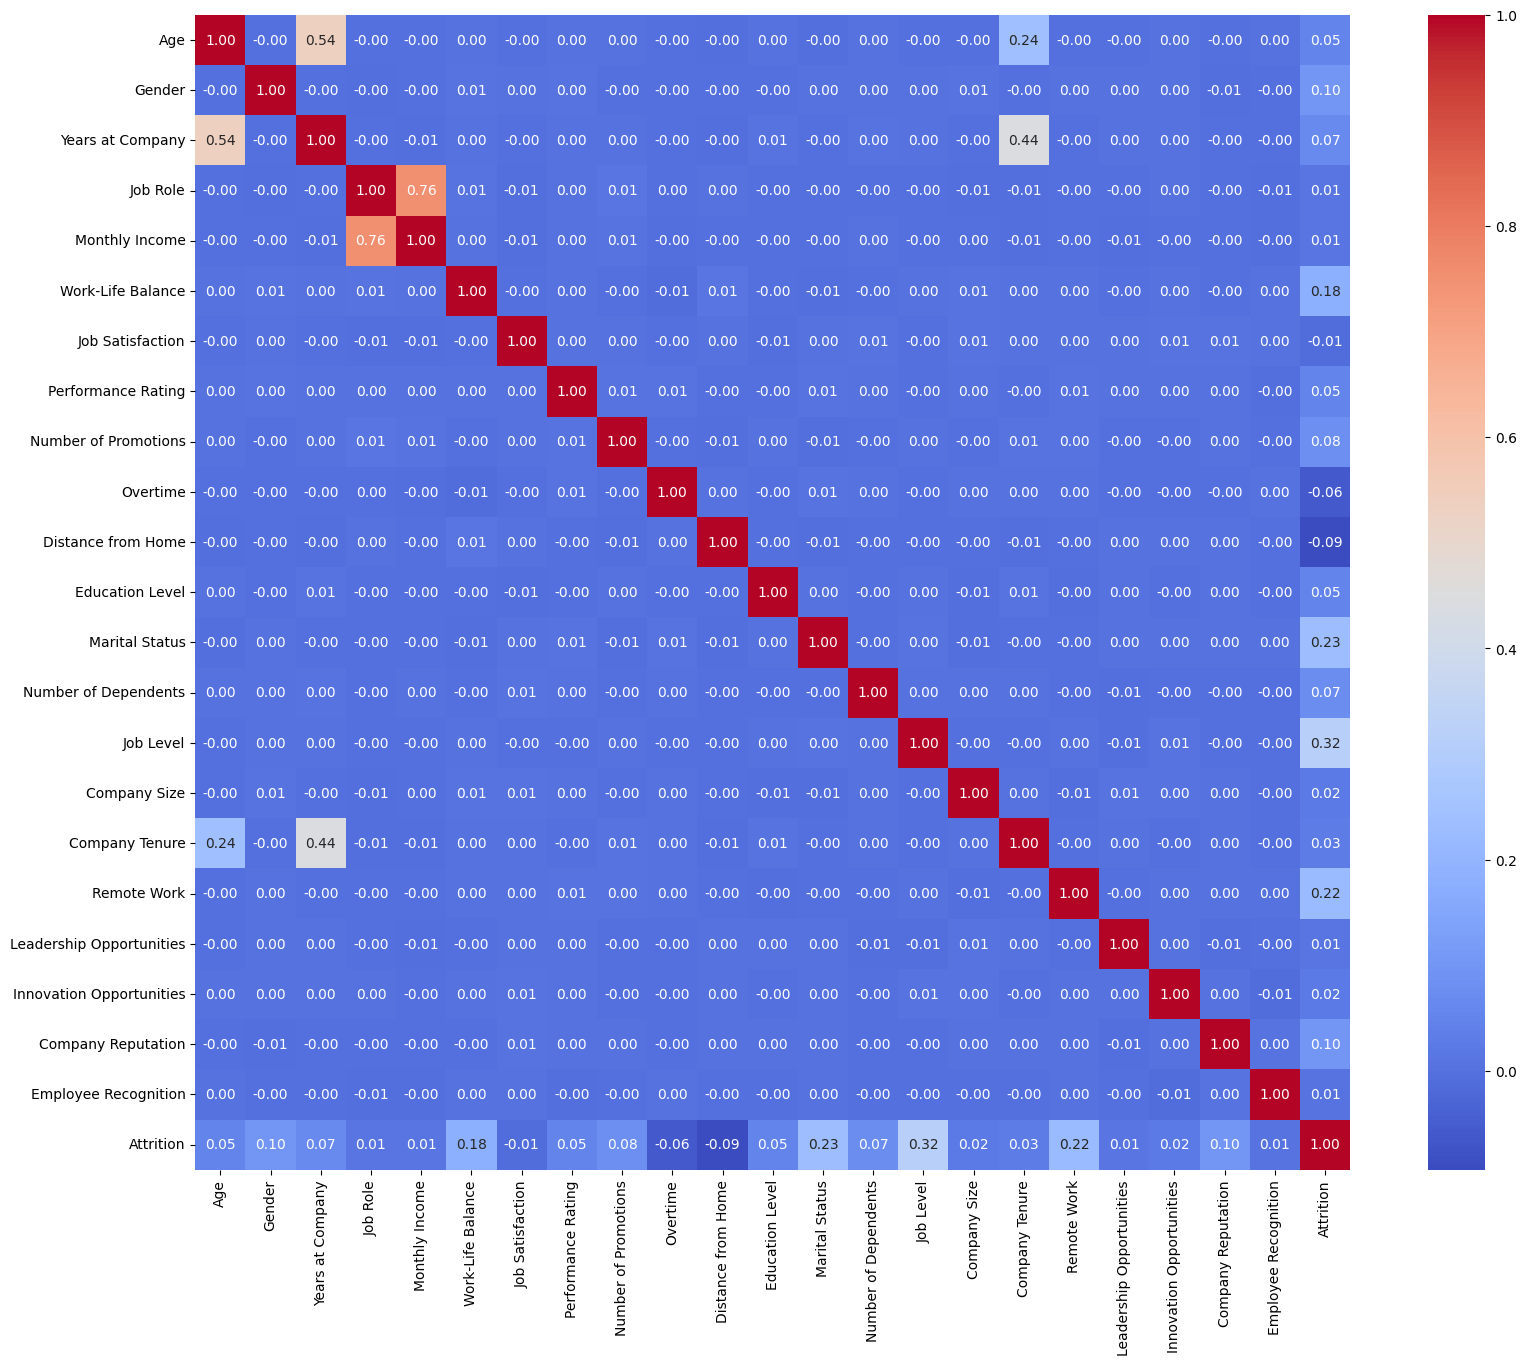

In [38]:
plt.figure(figsize=(20, 15))
# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
# Display the heatmap
plt.show()

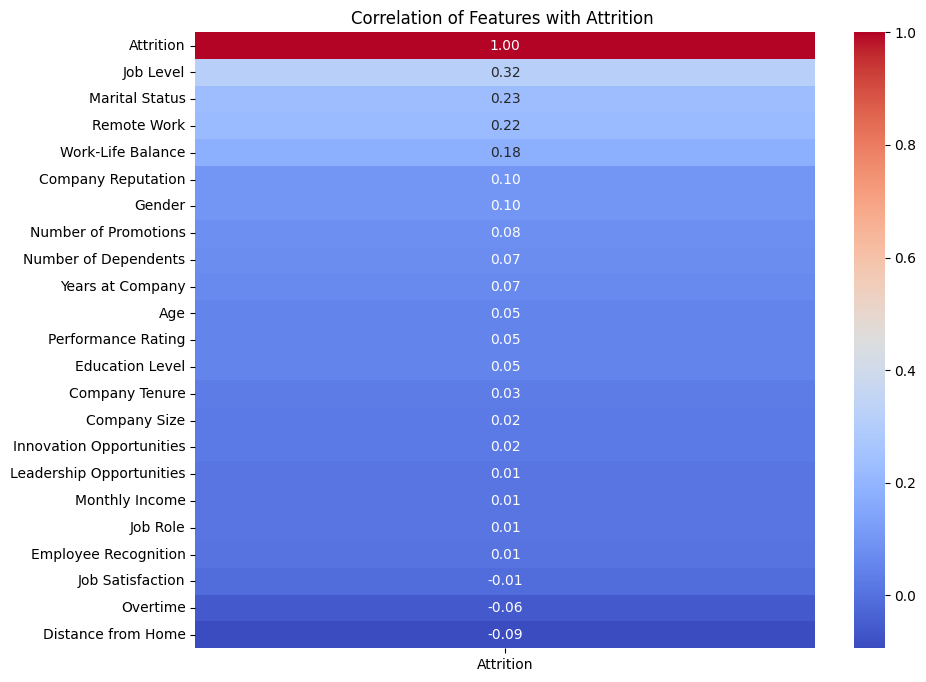

In [39]:
#Ensure that the figure size is appropriate
plt.figure(figsize=(10, 8))

# Create a bar plot to visualize the correlation with 'call drop category'
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)

 # Plotting the heatmap for these correlations
sns.heatmap(correlation_with_target.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

 # Add title for clarity
plt.title('Correlation of Features with Attrition ')

 #Display the heatmap
plt.show()

<ipython-input-40-c5b7331109ee>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


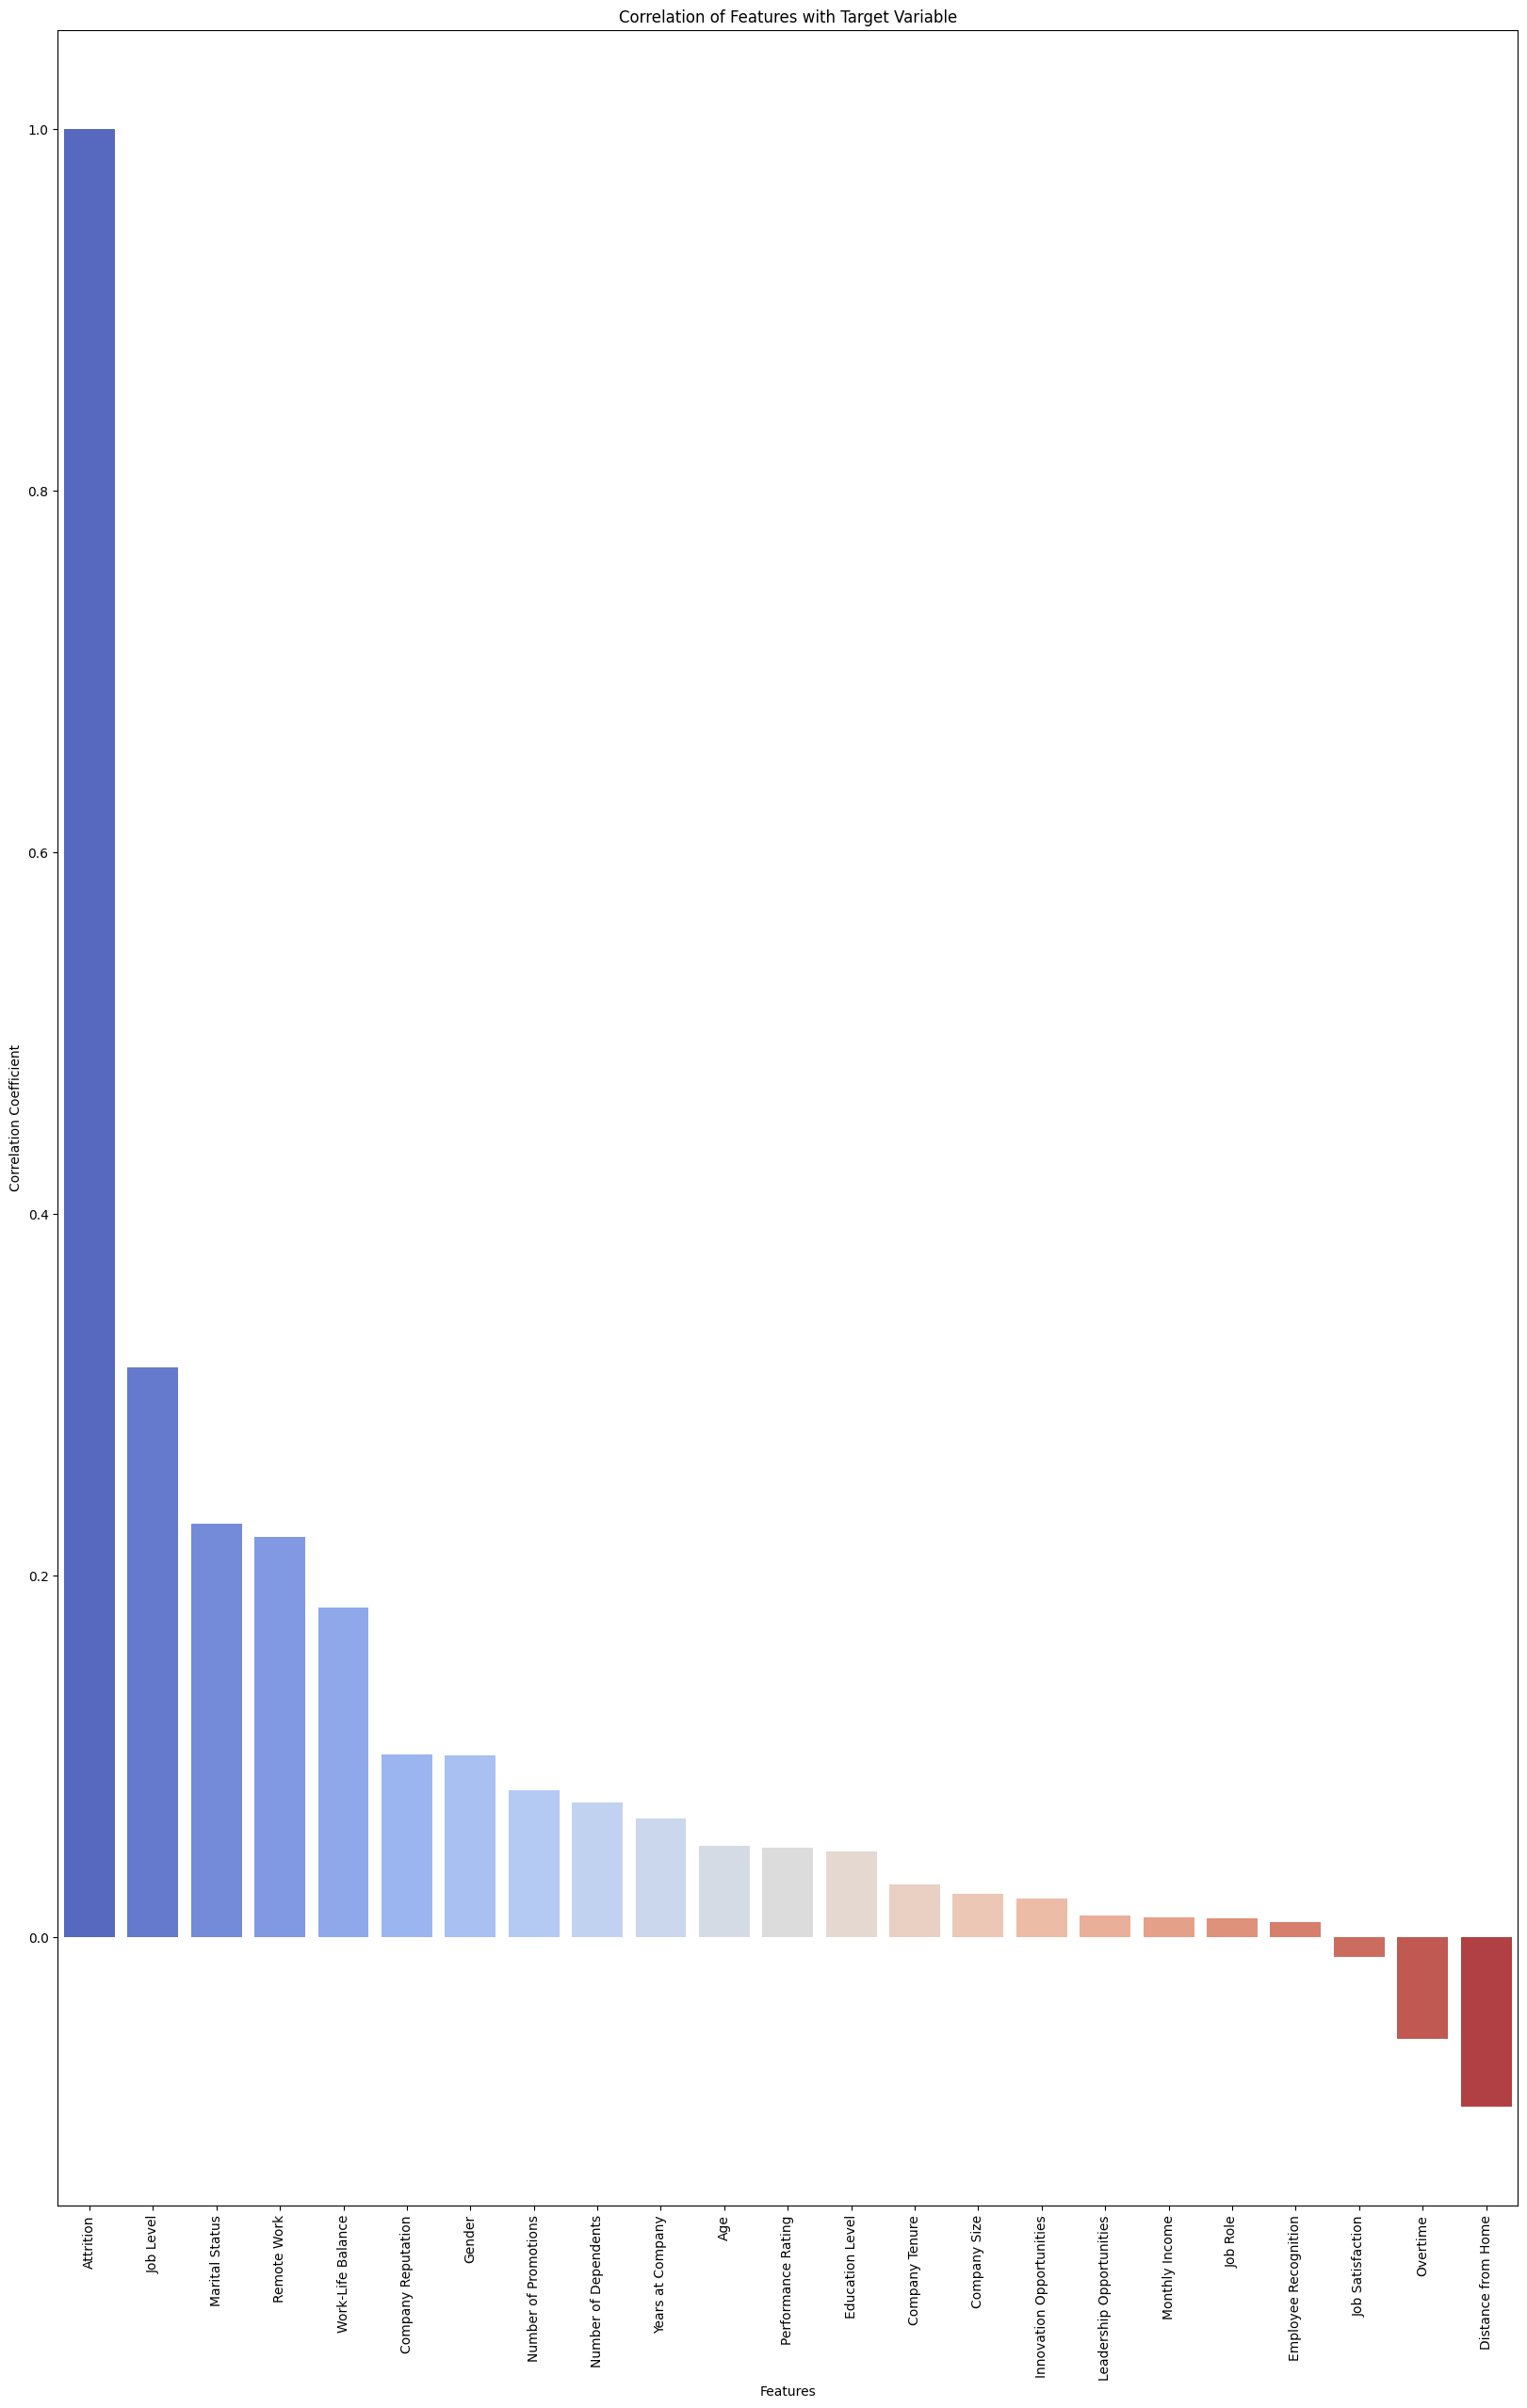

In [40]:
nu= df.select_dtypes(include=['int64', 'float64'])
correlation_matrix=nu.corr()
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)

# Plotting the correlation with target
plt.figure(figsize=(20, 30))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [41]:
#feature selected by analyzing the above charts and correlation matrix
y = df.Attrition
X = df.drop(columns=['Attrition','Job Role','Monthly Income','Employee Recognition','Job Satisfaction',
                     'Innovation Opportunities','Leadership Opportunities','Company Size','Gender','Performance Rating','Overtime'])

In [52]:
X.columns

Index(['Age', 'Years at Company', 'Work-Life Balance', 'Number of Promotions',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Tenure', 'Remote Work',
       'Company Reputation'],
      dtype='object')

In [42]:
X.shape

(74498, 12)

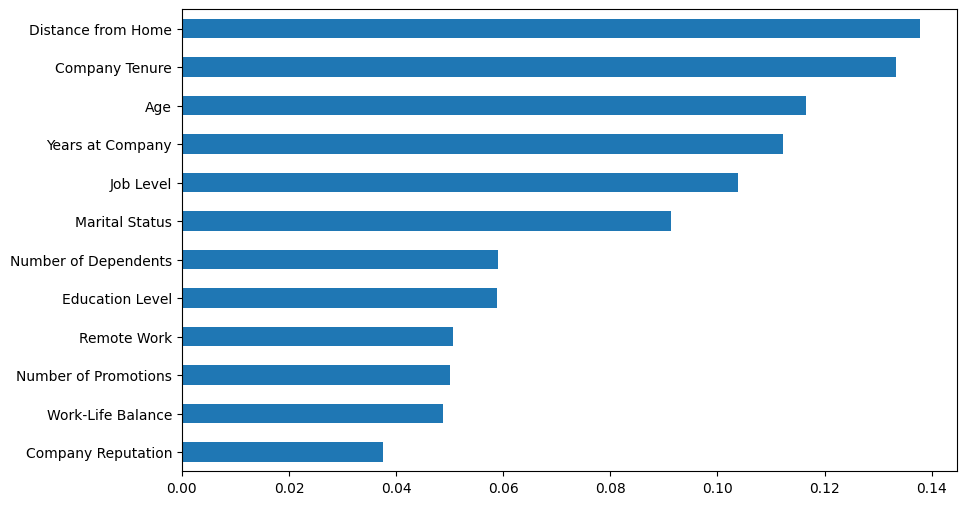

In [43]:
# Check feature importance using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.show()

**Model Selection**

In [44]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [45]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [46]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7202
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      7096
           1       0.72      0.75      0.74      7804

    accuracy                           0.72     14900
   macro avg       0.72      0.72      0.72     14900
weighted avg       0.72      0.72      0.72     14900

[[4864 2232]
 [1937 5867]]
Decision Tree Accuracy: 0.6631
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      7096
           1       0.68      0.68      0.68      7804

    accuracy                           0.66     14900
   macro avg       0.66      0.66      0.66     14900
weighted avg       0.66      0.66      0.66     14900

[[4582 2514]
 [2506 5298]]
Random Forest Accuracy: 0.7392
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      7096
           1       0.75      0.75      0.75      7804

    accuracy                 

**Hyperparameter Tuning**

In [49]:
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Subset the training data
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=2, verbose=2, random_state=42, n_jobs=4)
rf_random.fit(X_train_sample, y_train_sample)

print(f"Best parameters: {rf_random.best_params_}")
best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Tuned Random Forest Accuracy: 0.7515


Tuned Randon Forest Classifier had an accuracy of 75.15%

**Prediction**

In [55]:
import pandas as pd

# Define your new data with the specified features
new_data = pd.DataFrame({
    'Age': [30],  # Replace with actual values
    'Years at Company': [5],
    'Work-Life Balance': ['High'],
    'Number of Promotions': [1],
    'Distance from Home': [10],
    'Education Level': ['Bachelor’s Degree'],
    'Marital Status': ['Single'],
    'Number of Dependents': [2],
    'Job Level': [2],
    'Company Tenure': [7],
    'Remote Work': ['No'],
    'Company Reputation': ['Medium']
})

# Apply the same ordinal encoding for 'Education Level'
education_map = {
    'High School': 1,
    'Associate Degree': 2,
    'Bachelor’s Degree': 3,
    'Master’s Degree': 4,
    'PhD': 5
}
new_data['Education Level'] = new_data['Education Level'].map(education_map)

# Apply the same ordinal encoding for 'Work-Life Balance' and 'Company Reputation'
balance_map = {'Low': 1, 'Medium': 2, 'High': 3}
new_data['Work-Life Balance'] = new_data['Work-Life Balance'].map(balance_map)
new_data['Company Reputation'] = new_data['Company Reputation'].map(balance_map)

# Apply one-hot encoding for categorical variables
new_data = pd.get_dummies(new_data, columns=['Marital Status', 'Remote Work'], drop_first=True)

# Ensure all necessary columns are present (add missing columns with value 0)
for col in X.columns:
    if col not in new_data.columns:
        new_data[col] = 0

# Reorder columns to match the training data
new_data = new_data[X.columns]



# Make predictions using the trained model (assuming 'model' is your trained RandomForest model)
prediction = model.predict(new_data)

# Print the prediction
print("Predicted Attrition:", "Yes" if prediction[0] == 1 else "No")


Predicted Attrition: Yes
